# Layout analysis

## 1. Layout analysis visualization

In [1]:
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.getcwd() + '/..')
from scripts import read_transkribus_files

In [39]:
data_dir = "../../data/Overlijden/x-samples/three-columns-100-p2pala-2/page"
#data_dir = "../../data/Overlijden/x-samples/first-p2pala/page"

texts, metadata, textregions = read_transkribus_files.read_files(data_dir)

In [4]:
def get_largest_textregion(textregions):
    largest_surface = 0
    largest_textregion = None
    for textregion in textregions:
        surface = (textregion[1] - textregion[0]) * (textregion[3] - textregion[2])
        if surface > largest_surface:
            largest_surface = surface
            largest_textregion = textregion
    return largest_textregion

In [31]:
def visualize_textregions(textregions):
    for file_id in textregions:
        for textregion in textregions[file_id]:
            rectangle = plt.Rectangle((textregion[0], -textregion[2]), textregion[1]-textregion[0], textregion[2]-textregion[3], 
                                      edgecolor="black", facecolor="none", linewidth=1)
            plt.gca().add_patch(rectangle)
    plt.axis("scaled")
    plt.title("Positions of textregions on a page")
    plt.savefig("image.png")
    plt.show()

In [6]:
def get_integer_ticks(ticks):
    return [ tick for tick in ticks if int(tick) == tick ]

In [7]:
def sanity_check_textregions(textregions):
    for textregion_id in textregions:
        if len(textregions[textregion_id]) == 0:
            print_with_color(f"no textregions found for document {textregion_id}\n")

In [30]:
def visualize_textregions_frequencies(textregions):
    frequencies = {}
    for file_id in textregions:
        frequency = len(textregions[file_id])
        if frequency in frequencies:
            frequencies[frequency] += 1
        else:
            frequencies[frequency] = 1
    plt.bar(frequencies.keys(), frequencies.values())
    plt.title("Number of regions per text")
    plt.xticks(get_integer_ticks(plt.xticks()[0]))
    plt.savefig("image.png")
    plt.show()

In [34]:
three_columns_data =  { textregion_id: textregions[textregion_id] 
                        for textregion_id in textregions if textregion_id <= 1869001 }
two_columns_data =    { textregion_id: textregions[textregion_id] 
                        for textregion_id in textregions if textregion_id > 1869001 }
largest_textregions = { textregion_id: [get_largest_textregion(textregions[textregion_id])]
                        for textregion_id in textregions }     

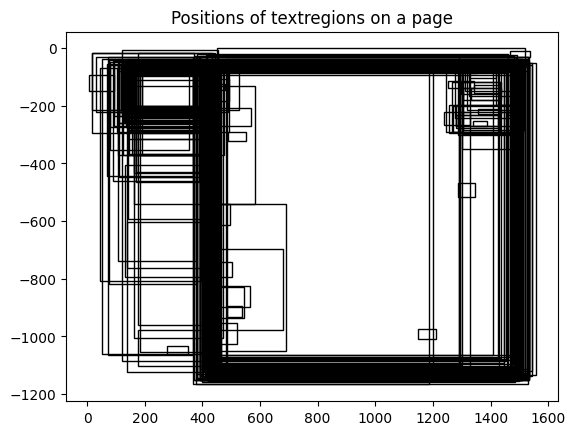

In [40]:
visualize_textregions(textregions)

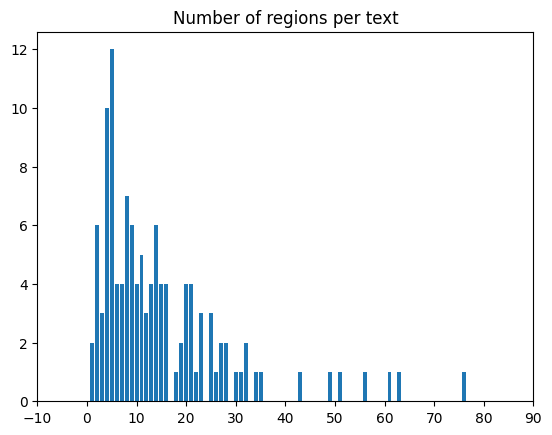

In [14]:
visualize_textregions_frequencies(textregions)

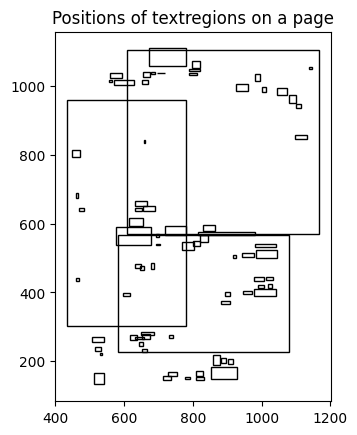

In [15]:
textregion_id = 1831001
visualize_textregions({ textregion_id: textregions[textregion_id] })

In [16]:
sanity_check_textregions(textregions)